## * Importing Libraries/Dataset

In [1]:
# Importing general libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Importing Chi-Square test library
from scipy.stats import chi2_contingency

# Importing model related libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.display import display, HTML

In [2]:
file = "adult.csv"
data_raw = pd.read_csv(file)

## * Data Visualization and Exploration

In [3]:
# Printing the random 10 rows for sanity check to identify all the features present in the dataset and 
# if the target matches with them.
display(HTML('<b>Table 1: Displaying 10 random rows</b>'))
data_raw.sample(10, random_state=9)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
31258,36,Private,225399,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,>50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
15172,57,Private,262681,Some-college,10,Widowed,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
29082,26,Self-emp-inc,176981,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,50,United-States,<=50K
40559,33,Private,168030,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,32,United-States,<=50K
45934,34,Private,185556,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,12,United-States,>50K
35416,19,Private,136306,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,24,United-States,<=50K
9318,35,Private,327164,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,40,United-States,>50K
32455,42,Private,190179,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
41445,20,Private,47541,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,30,United-States,<=50K


In [4]:
# Printing the shape of the dataset to understand the data dimension.
data_raw.shape

(48842, 15)

#### Observations:
1. The evaluation so far highlights that the dataset has 15 variables (including class) with 48842 entries in each columns. The class has binary, <=50k and >50K, labels. The task thus is to make a classification model that predicts if a person makes over 50k or not.

In [5]:
# Printing the data info to identify the data type and to know if there are any missing values in the dataset.
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Printing the unique values to understand the descrete/continuous data type and 
# to know if there are missing values.
for col in data_raw:
    if data_raw[col].dtype == "object":
        print("Unique values for " + col + ":", data_raw[col].unique(), sep="\n")
        print()

Unique values for workclass:
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values for education:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Unique values for marital-status:
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values for occupation:
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Unique values for relationship:
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Unique values for race:
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Unique values for gender:

#### Observations:-
1. From the info, it is evident that there are 8 independent features which are categorical and 6 independent features which are quantitative in nature. Also, from the unique value printing, it can be observed that the "workclass", "occupation" and "native country" features have some values with "?" entries . We will replace the "?" with nan and use separate technique (later) to deal with this.

In [7]:
for col in data_raw.columns:
    data_raw[col] = data_raw[col].replace("?", np.nan)

In [8]:
# Creating summary statistics - Continuous feaatures
display(HTML('<b>Table 2: Summary statistics - continuous features</b>'))
data_raw.describe(include='int64')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Creating summary - Categorical feaatures
display(HTML('<b>Table 3: Summary statistics - categorical features</b>'))
data_raw.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


#### Observations:-
1. The "age" feature [Table 2] seems to be the correct data with the age-range from 17 till 90.
2. The "educational-num" feature [Table 2] with min range from 1 and max range to 16 with discrete values seems to be a numerical representation of "education" feature [Table 3]. We will test the dependency of these features later.
3. The "capital-gain" and "capital-loss", both these features have till Q3 quartile 0 value. Thus we will check later the % of 0 values for these features and will be dealt with accordingly.
4. The "hours-per-week" and "capital-gain" features seem to have outlier in it's maximum value of 99999 and 99, respectively. We will dealt with this outlier later separately.

In [10]:
# Counting the entries for each categorical variables and understanding the distribution.
display(HTML('<b>Table 4: Unique value counts of each features</b>'))
for col in data_raw:
    if data_raw[col].dtype == "object":
        print("Feature: " + col + "-", data_raw[col].value_counts(), sep="\n")
        print()

Feature: workclass-
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Feature: education-
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Feature: marital-status-
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Feature: occupation-
Prof-specialty       6172
Craft-repair 

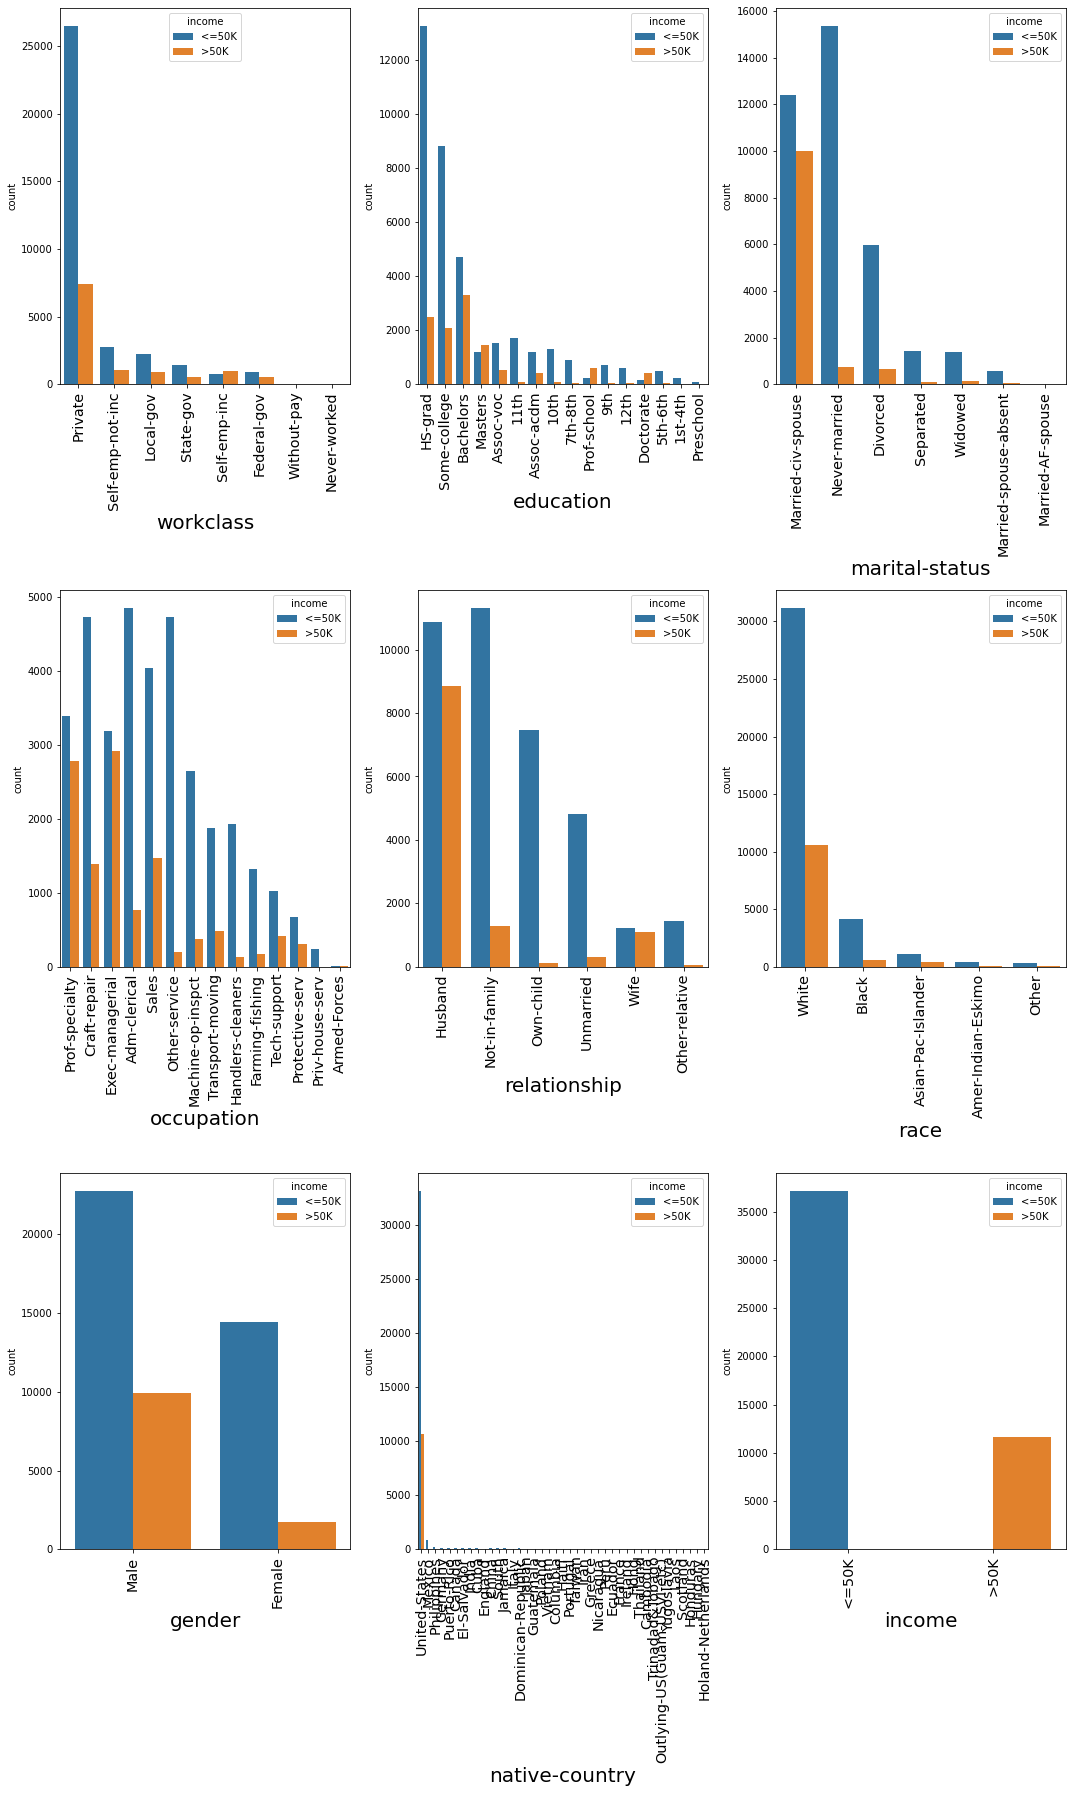

In [11]:
# Counting the entries for each categorical variables and understanding the distribution.
display(HTML('<b>Figure 1: Distribution of each features</b>'))
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in data_raw:
    if data_raw[col].dtype == "object":
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(data_raw[col], hue=data_raw["income"], order=data_raw[col].value_counts().index)
        plt.xlabel(col,fontsize=20)
        plt.xticks(rotation=90,
                   horizontalalignment='center',
                   fontweight='light',
                   fontsize='x-large')
        plotnumber+=1
plt.tight_layout()

#### Observations:-
1. Comparing workclass, most people are doing private jobs. There are significantly high number of people in the private job who are earning <50K. More number of eople who are "self-employed" are earning >50K compared to those earning <50K. The feature seems to be legit.  
2. Looking at the educational qualificiation, there are more high school grades. More bachelors degree holders are earning >50K compared to those with other educational degree. Amon doctorate holders, more people are earning >50K.
3. In marital-status, the married couples are earning more than other groups.
4. Husbands and males are earning more than wife's/females.
5. With The number of entries for each unique values for categorical class are imbalanced with entries where there are very few entries. Also the two labels for "income" class, which is of our interest, has more entries to <=50K (37155) than to >50K (11687). We need to deal with this imbalanced dataset separately later.
6. For "native-country" feature, most of the entries are for US country compared to other and thus all the other countries will be represented as "other".
7. Similarly, for "race" feature, since white have significantly high entries compared to other races, rest of the races will be named "other".

In [12]:
# Replacing other countries and races
data_transform1 = data_raw.copy(deep = True)
data_transform1.loc[data_transform1['native-country'] != 'United-States', 'native-country'] = 'Other'
data_transform1.loc[data_transform1['race'] != 'White', 'race'] = 'Other'

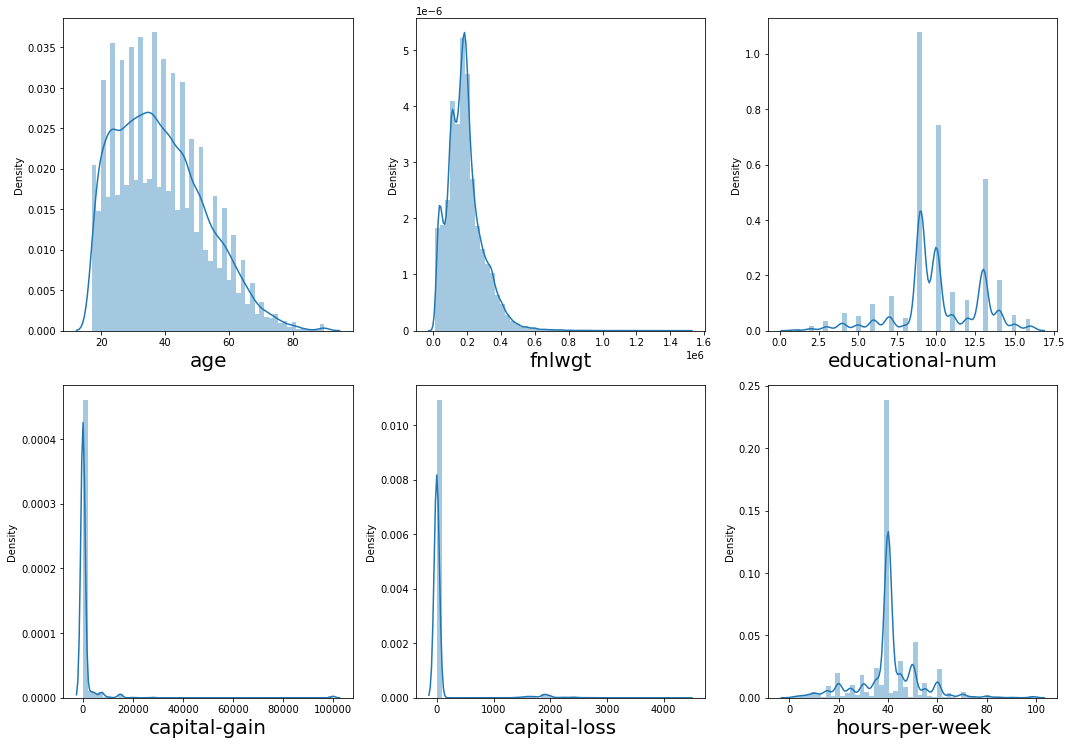

In [13]:
# Plotting the distribution for the continuous variable to understand the distribution.
display(HTML('<b>Figure 2: Distribution of each continuous features</b>'))
plt.figure(figsize=(15,15), facecolor="white")
plotnumber=1
for col in data_raw:
    if data_raw[col].dtype != "object":
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_raw[col])
        plt.xlabel(col,fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [14]:
# Skewnewss check
display(HTML('<b>Table 5: Skewness information for each continuous features</b>'))
print(data_transform1.skew().sort_values(ascending = False))

capital-gain       11.894659
capital-loss        4.569809
fnlwgt              1.438892
age                 0.557580
hours-per-week      0.238750
educational-num    -0.316525
dtype: float64


##### Observations:-
1. The "age" features shows that the more people are aged between 20 to 45 age group. 
2. The skewness of "capital-gain" and "capital-loss" features are way higher and as can be seen even in the distribution plot, the feature is right-skewed with high frequency of 0. Let's check the % of 0 value for these two features.
2. For "fnlwgt" the skewness is greater than 1 but not significantly higher, thus log-transformation methodology will be tried to reduce the skewness.

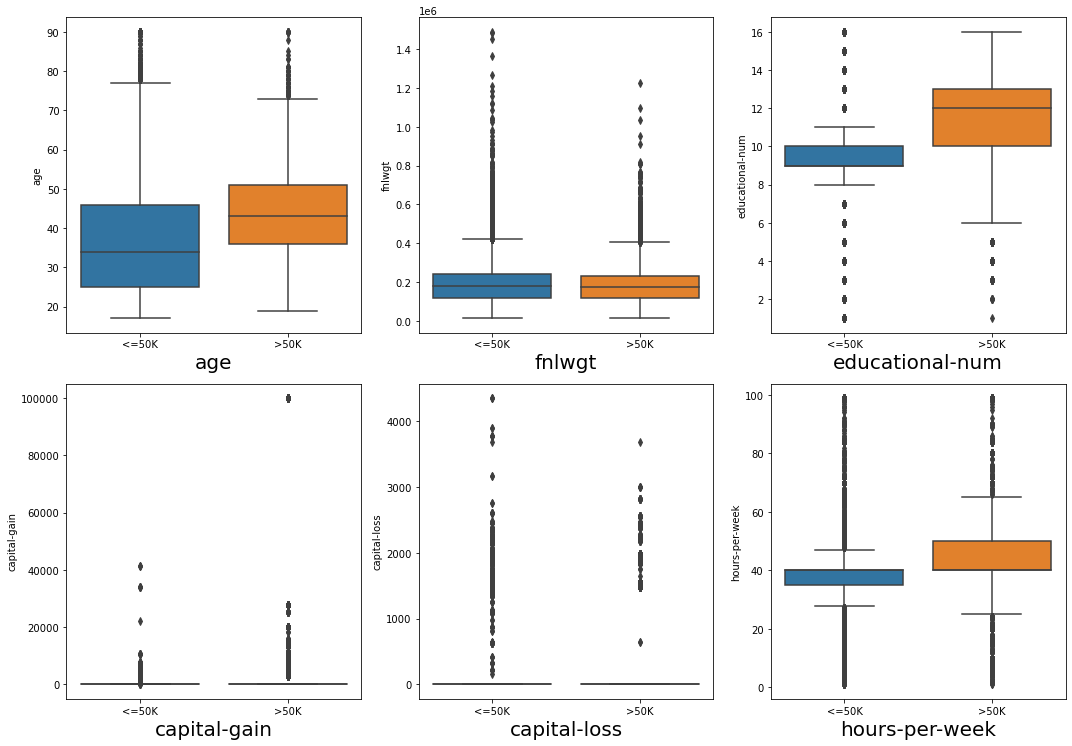

In [15]:
# Plotting the distribution for the continuous variable to understand the distribution.
display(HTML('<b>Figure 3: Distribution of each continuous features against class labels</b>'))
plt.figure(figsize=(15,15), facecolor="white")
plotnumber=1
for col in data_raw:
    if data_raw[col].dtype != "object":
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data_raw['income'], y=data_raw[col])
        plt.xlabel(col,fontsize=20)
        plotnumber+=1
plt.tight_layout()

#### Observations:-
1. People with higher age earn more income than the people with lower age.
2. People with higher education earn more than the people with lower education. However, the overall spread is mix which implies there are people (less than 25 %) who are less educated but earn >50K income.
3. People who work more earn more than the people who work less.

In [16]:
# Also since "education" and "education-num" are seems to be similar data as seen in Table 3 observations,
# let's check the correlation using Chi-Square test
print("education (shape): ", data_transform1["education"].unique().shape)
print("education-num (shape): ", data_transform1["educational-num"].unique().shape)
print()

# Cross tabulation between "education" and "education-num"

CrosstabResult = pd.crosstab(index = data_transform1["education"], columns = data_transform1["educational-num"])
display(HTML('<b>Table 6: Contigency table b/w "education" and "educational-num" features</b>'))
print(CrosstabResult)

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
print()
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

education (shape):  (16,)
education-num (shape):  (16,)



educational-num  1    2    3    4    5     6     7    8      9      10    11  \
education                                                                      
10th              0    0    0    0    0  1389     0    0      0      0     0   
11th              0    0    0    0    0     0  1812    0      0      0     0   
12th              0    0    0    0    0     0     0  657      0      0     0   
1st-4th           0  247    0    0    0     0     0    0      0      0     0   
5th-6th           0    0  509    0    0     0     0    0      0      0     0   
7th-8th           0    0    0  955    0     0     0    0      0      0     0   
9th               0    0    0    0  756     0     0    0      0      0     0   
Assoc-acdm        0    0    0    0    0     0     0    0      0      0     0   
Assoc-voc         0    0    0    0    0     0     0    0      0      0  2061   
Bachelors         0    0    0    0    0     0     0    0      0      0     0   
Doctorate         0    0    0    0    0 

##### Observations:-
1. Clearly the P-value is 0.0 showing complete correlation between these two features. We will eliminate "educational-num" feature from the data.

## * Data Pre-processing and cleaning

In [17]:
# Checking the unique value distribution for "capital-gain" and "capital-loss"
#Lets write a function to get percentages of 0s in numerical column
print("capital-gain [0 %]:", round(np.count_nonzero(data_transform1["capital-gain"]==0)*100/len(data_transform1["capital-gain"]),0))
print("capital-loss [0 %]:", round(np.count_nonzero(data_transform1["capital-loss"]==0)*100/len(data_transform1["capital-loss"]),0))

capital-gain [0 %]: 92.0
capital-loss [0 %]: 95.0


In [18]:
# Since the number of 0 % in "capital-gain" and "capital-loss" are high (i.e. > 90 %), these features 
# will be removed from further assessment.
data_transform2 = data_transform1.copy(deep = True)
data_transform2.drop(["capital-gain", "capital-loss", "educational-num", "native-country"], axis=1, inplace=True)

In [19]:
# Verifying if the features are removed
data_transform2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'income'],
      dtype='object')

In [20]:
# Identifying the missing value

for col in data_transform2.columns:
    if data_transform2[col].isnull().sum() != 0:
        per_missing = round((data_transform2[col].isnull().sum()/len(data_transform2))*100, 2)
        data_type = data_transform2[col].dtype
        print(f"The '{col}' which is a '{data_type}' attribute has {per_missing} % missing data.")

The 'workclass' which is a 'object' attribute has 5.73 % missing data.
The 'occupation' which is a 'object' attribute has 5.75 % missing data.


In [21]:
# Since the missing values are substantial and also all the three attributes, with missing data, are categorical variable, 
# we have considered "mode imputation" method to replace the missing information.
data_transform2["workclass"] = data_transform2["workclass"].fillna(data_transform2["workclass"].mode()[0])
data_transform2["occupation"] = data_transform2["occupation"].fillna(data_transform2["occupation"].mode()[0])

The skewness information after transformation:
fnlwgt   -0.836303
dtype: float64


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


Text(0.5, 0, 'After transformation')

<Figure size 432x288 with 0 Axes>

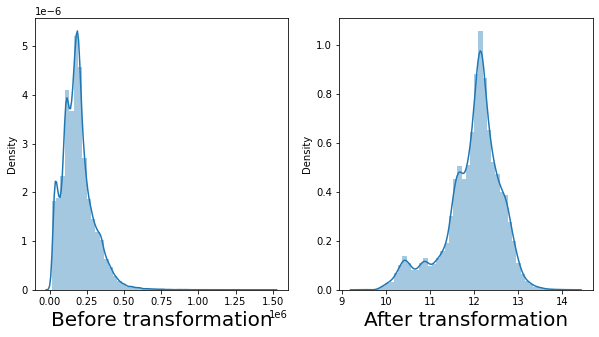

In [22]:
# Working on the skewness of the continuous variables "fnlwgt" through log transformation.
data_transform3 = data_transform2.copy(deep = True)

data_transform3.fnlwgt = data_transform3.fnlwgt.map(lambda x: np.log(x+1))
print("The skewness information after transformation:")
print(data_transform3[["fnlwgt"]].skew().sort_values(ascending = False))

# Check before and after distribution of the "fnlwgt" attribute.
display(HTML('<b>Figure 4: Skewness of "fnlwgt" feature before and after the transformation</b>'))
plt.figure(facecolor="white")
plt.figure(figsize=(10,5), facecolor="white")
ax = plt.subplot(1,2,1)
print(sns.distplot(data_transform2.fnlwgt))
plt.xlabel("Before transformation",fontsize=20)
ax = plt.subplot(1,2,2)
print(sns.distplot(data_transform3.fnlwgt))
plt.xlabel("After transformation",fontsize=20)

##### Observations:-
1. After log-transformation, the skewness has significantly reduced below 1 which is acceptable range.

Text(0.5, 1.0, 'Pearson Correlation')

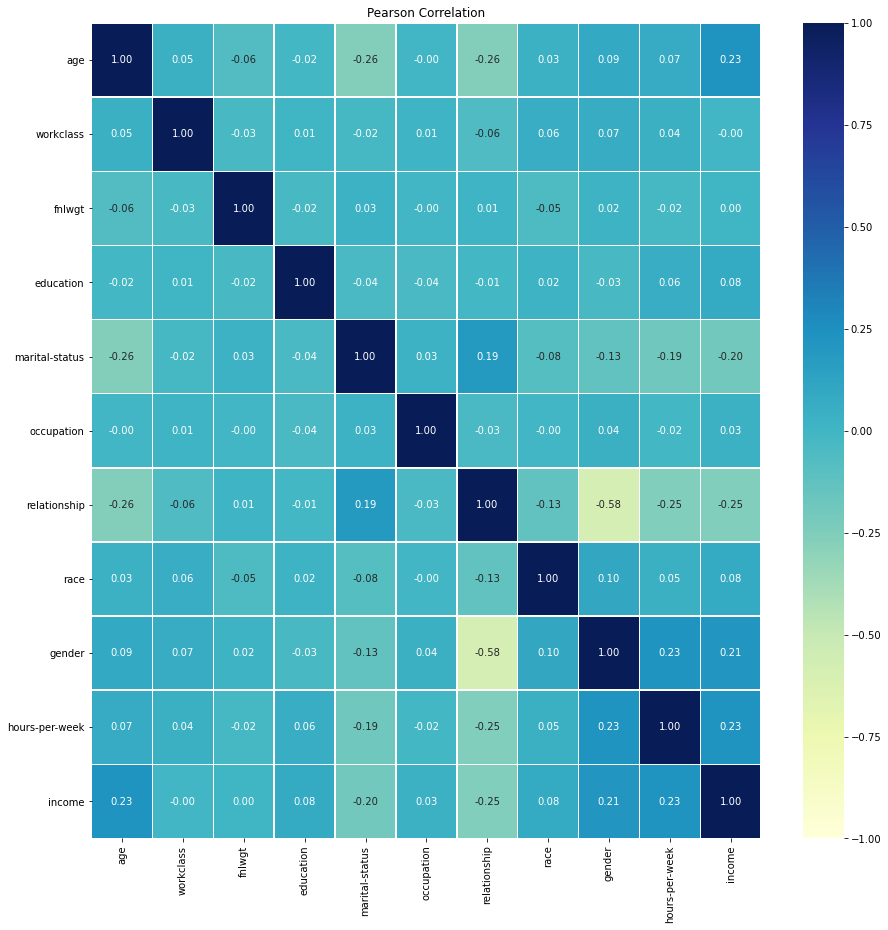

In [23]:
# Correlation
display(HTML('<b>Figure 5: Pearson Correlation Matrix</b>'))
corr_matrix = data_transform3.copy(deep=True)
plt.figure(figsize=(15, 15), facecolor="white")
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson Correlation")

#### Observations:-
1. There is no correlation among the features and neither between the features and the class. This shows that the features are good to be considered as a final feature.

In [24]:
data_transform3.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'income'],
      dtype='object')

## * Data Preparation

In [25]:
# In order to have more stable and accurate model-generation, it is important to scale the variables in order to make 
# the problem easier to learn.

data_transform4 = data_transform3.copy(deep = True)

scaler = MinMaxScaler(feature_range = (0, 1))

data_transform4[["age", "fnlwgt", "hours-per-week"]] = scaler.fit_transform(data_transform3[["age",
                                                                                               "fnlwgt", "hours-per-week"]])

In [26]:
display(HTML('<b>Table 7: 10 random readings of the continuous features after min-max normalization</b>'))
data_transform4[["age", "fnlwgt", "hours-per-week"]].sample(10, random_state=19)

,age,fnlwgt,hours-per-week
44575,0.657534,0.591968,0.653061
5542,0.575342,0.664843,0.428571
23440,0.123288,0.455080,0.602041
34224,0.260274,0.573078,0.397959
32339,0.287671,0.578658,0.500000
31189,0.027397,0.405899,0.183673
15397,0.479452,0.514990,0.397959
40246,0.260274,0.486246,0.500000
13192,0.246575,0.725669,0.500000
28169,0.232877,0.604357,0.724490


In [27]:
# We will start with one-hot-encoding which is required to convert categorical values to numerical values.
data_model = data_transform4.copy(deep = True)
data_encoded = pd.get_dummies(data_model, drop_first=True)

display(HTML('<b>Table 8: Feature one-hot-encoding</b>'))
data_encoded.head()

,age,fnlwgt,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,income_>50K
0,0.109589,0.607631,0.397959,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.287671,0.414579,0.500000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.150685,0.690130,0.397959,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0.369863,0.535339,0.397959,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0.013699,0.444131,0.295918,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [28]:
# Get only the columns containing features that is all columns from 'age' to 'occupation_ Transport-moving'
# This range contains all the features but not the target
features = data_encoded.drop(["income_>50K"], axis = 1)

# extract NumPy arrays
X = features.values
y = data_encoded['income_>50K'].values
print(f"X.shape: {X.shape}  y.shape: {y.shape}")

X.shape: (48842, 51)  y.shape: (48842,)


In [29]:
# Split-out test train data
# Because of the imbalanced response level, we will use stratified sampling technique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29, stratify=y)

## * Model Building

In [30]:
# Spot Checking the performance of three algorithms - Naive Bayes, Logistic Regression and Decision Tree 
models = []
models.append(("NB-B", BernoulliNB()))
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier(criterion = "gini", splitter = "best", 
                                              max_depth = None, min_samples_split = 2, min_samples_leaf = 1)))
# Evaluate each model in turn
results_accuracy = []
results_loss = []
names = []
display(HTML('<b>Table 9: Model accuracy range for different models</b>'))
for name, model in models:
    rskf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 39)
    cv_results_accuracy = cross_val_score(model, X_train, y_train, cv = rskf, scoring = "accuracy")
    cv_results_loss = cross_val_score(model, X_train, y_train, cv = rskf, scoring = "neg_log_loss")
    results_accuracy.append(cv_results_accuracy)
    results_loss.append(cv_results_loss)
    names.append(name)
    print("Min accuracy possible: %s %f Max accuracy posssible: %f" % (name, round(cv_results_accuracy.min(),2)*100, 
                                                                       round(cv_results_accuracy.max(),2)*100))
    print("Accuracy mean (StdDev): %f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std()))
    print("Min log-loss possible: %s %f Max log-loss posssible: %f" % (name, round(cv_results_loss.min(),2)*100, 
                                                                       round(cv_results_loss.max(),2)*100))
    print("Log-loss mean (StdDev): %f (%f)" % (cv_results_loss.mean(), cv_results_loss.std()))

Min accuracy possible: NB-B 76.000000 Max accuracy posssible: 79.000000
Accuracy mean (StdDev): 0.777478 (0.006830)
Min log-loss possible: NB-B -53.000000 Max log-loss posssible: -46.000000
Log-loss mean (StdDev): -0.494232 (0.017463)
Min accuracy possible: LR 83.000000 Max accuracy posssible: 85.000000
Accuracy mean (StdDev): 0.834228 (0.004966)
Min log-loss possible: LR -37.000000 Max log-loss posssible: -34.000000
Log-loss mean (StdDev): -0.353119 (0.006843)
Min accuracy possible: DT 76.000000 Max accuracy posssible: 79.000000
Accuracy mean (StdDev): 0.776454 (0.006025)
Min log-loss possible: DT -824.000000 Max log-loss posssible: -738.000000
Log-loss mean (StdDev): -7.729631 (0.199949)


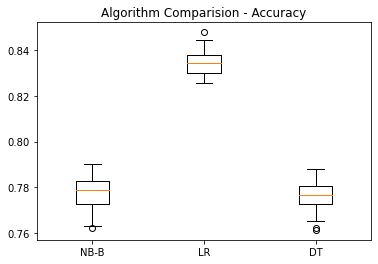

In [31]:
display(HTML('<b>Figure 6: Diferent model accuracy distribution</b>'))
plt.boxplot(results_accuracy, labels = names, notch = False, vert = True, whis = True)
plt.title("Algorithm Comparision - Accuracy")
plt.show()

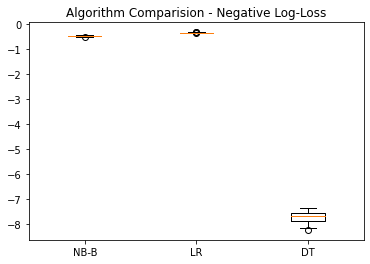

In [32]:
# log-loss is an implementation of the error metric which is as most error metrics a positive number. 
# In this case, it is a metric which is generally minimized (e.g. as mean squared error for regression)
# in contrast to metrics such as accuracy which is maximized.
# The negative log-loss is a technicality to create a utility value, which allows optimizing functions and classes to maximize
# this utility without having to change the function's behavior for each metric.

display(HTML('<b>Figure 7: Diferent model negative log-loss distribution</b>'))
plt.boxplot(results_loss, labels = names, notch = False, vert = True, whis = True)
plt.title("Algorithm Comparision - Negative Log-Loss")
plt.show()

Naive Bayes'
0.7714461202484133
              precision    recall  f1-score   support

           0       0.92      0.76      0.84     11147
           1       0.51      0.80      0.62      3506

    accuracy                           0.77     14653
   macro avg       0.72      0.78      0.73     14653
weighted avg       0.82      0.77      0.79     14653



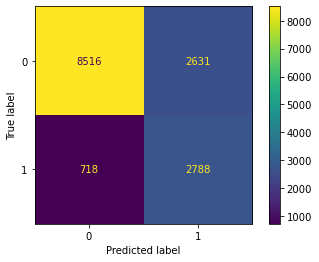

In [33]:
# Make predictions on validation dataset
model = BernoulliNB()

# model = NaiveBayes()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print("Naive Bayes'")
print(accuracy_score(y_test, predictions))
print(plot_confusion_matrix(model, X_test, y_test))
print(classification_report(y_test, predictions))

Logistic Regression
0.8362110148092541
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11147
           1       0.70      0.55      0.62      3506

    accuracy                           0.84     14653
   macro avg       0.78      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653



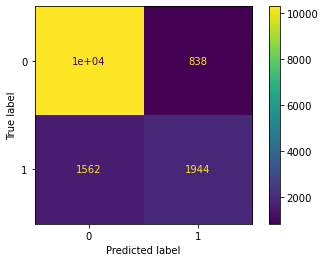

In [34]:
# Make predictions on validation dataset
model = LogisticRegression(random_state = 39)

# model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print("Logistic Regression")
print(accuracy_score(y_test, predictions))
print(plot_confusion_matrix(model, X_test, y_test))
print(classification_report(y_test, predictions))

Decision Tree
0.7756773356991742
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     11147
           1       0.53      0.56      0.54      3506

    accuracy                           0.78     14653
   macro avg       0.69      0.70      0.70     14653
weighted avg       0.78      0.78      0.78     14653



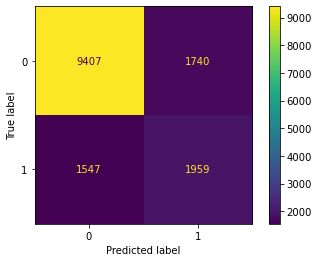

In [35]:
# Make predictions on validation dataset
model = DecisionTreeClassifier(criterion = "gini", splitter = "best", 
                               max_depth = None, min_samples_split = 2, min_samples_leaf = 1)

# model = Decision Tree()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print("Decision Tree")
print(accuracy_score(y_test, predictions))
print(plot_confusion_matrix(model, X_test, y_test))
print(classification_report(y_test, predictions))

#### Observations:-
1. Accuracy talks about the correct prediction probability of our model. We bserved 77 % accuracy with Naive Bayes, 84 % with Logistic Regression and 77 % with Decision Tree models. Though all the three accuracy levels are good, we observed highest model accuracy with Logistic Regression.
2. Precision is the measure of how many observations (thing we are trying to predict) our model correctly predicted over the amount of correct and incorrect predictions. In our case, when the model predicted someone has earned more than 50K income, that prediction is correct what % of the time. Precision observed for both the class from Naive Bayes (0.92, 0.51), Logistic Regression (0.87, 0.70) and Decision Tree (0.86, 0.53) shows that the prediction precision for both the class is better in Logistic Regression among all the three models.
3. Recall is the measure of how many observations our model correctly predicted over the total amount of observations. In our case it shows that if there are people who are earning high, in the test set, about what % of the time the model can predict that correctly. Recall observed for both the class from Naive Bayes (0.76, 0.80), Logistic Regression (0.92, 0.55) and Decision Tree (0.84, 0.56).
4. Sometimes it would be best to maximize both Precision and Recall scores for a model. In such case, F1 Score is the score to use above all else. F1 observed for both the class from Naive Bayes (0.84, 0.62), Logistic Regression (0.90, 0.62) and Decision Tree (0.85, 0.54).
5. Since, the exact problem statement is not known to us, we will consider F1 score as the best way to evaluate our models.
5. It is observed that the Logistic Regression is the best model among all the three combined. We will use this algorithm for further improvement possibility and analysis.
2. In addition, under-sampling/over-sampling and hyperparameter tuning will be investigated for the Logistic Regression model because of the imbalanced dataset.

Logistic Regression before SMOTE
Accuracy Score: 0.8362110148092541
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11147
           1       0.70      0.55      0.62      3506

    accuracy                           0.84     14653
   macro avg       0.78      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

Area Under Curve: 0.739650429966883


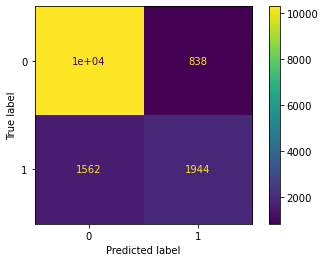

In [36]:
# Define model
logreg1 = LogisticRegression(random_state = 39)

# Fit the model
logreg1.fit(X_train,y_train)

# Test the model
y_pred = logreg1.predict(X_test)

# Evaluate predictions
print("Logistic Regression before SMOTE")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(logreg1, X_test, y_test)
print(classification_report(y_test, y_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

In [37]:
# Train Dataset balance study
print("Response counts of label '0': {}".format(sum(y_train == 0)/len(y_train == 0)))
print("Response counts of label '1': {}".format(sum(y_train == 1)/len(y_train == 1)))

Response counts of label '0': 0.7607125098715961
Response counts of label '1': 0.23928749012840386


In [38]:
# SMOTE technique for upsampling the minority label (1 in our case) and 
# RandomUnderSampler technique for down-sampling the majority label (0 in our case) 
# will be used to deal with the data imbalance.

smote = SMOTE(sampling_strategy = 'minority')
under_sampling = RandomUnderSampler(sampling_strategy='majority', random_state = 49)

steps = [('o', smote), ('u', under_sampling)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

In [39]:
# Train Dataset balance study
print("Response counts of label '0': {}".format(sum(y_train_res == 0)/len(y_train_res == 0)))
print("Response counts of label '1': {}".format(sum(y_train_res == 1)/len(y_train_res == 1)))

Response counts of label '0': 0.5
Response counts of label '1': 0.5


Logistic Regression before SMOTE
Accuracy Score: 0.7821606496963079
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     11147
           1       0.53      0.85      0.65      3506

    accuracy                           0.78     14653
   macro avg       0.73      0.80      0.75     14653
weighted avg       0.84      0.78      0.80     14653

Area Under Curve: 0.8045221763140311
Recall score: 0.847404449515117


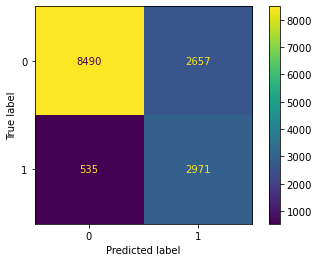

In [40]:
# Assessing the improvement
# Define model
logreg2 = LogisticRegression(random_state = 39)
# Fit the model
logreg2.fit(X_train_res,y_train_res)

# Test the model
y_pred = logreg2.predict(X_test)

# Evaluate predictions
print("Logistic Regression before SMOTE")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(logreg2, X_test, y_test)
print(classification_report(y_test, y_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

#### Observations and model tuning :-
1. As observed, after the minority upsampling followed by majority downsampling, the model performance has improved on F1 score for <50K class (0.65 from 0.62) and reduced slightly for >50K class (0.84 from 0.90). 
2. Hyperparameter makes our model more fine-tune the parameters and also we can manually fine-tune our parameters for robust model and can see the difference in importance of using parameters. list of regularization and different penalty parameters will be considered to evaluate the most optimized hyperparameter to identify the improvement opportunity in the model.

In [41]:
# Model fine-tuning
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = logreg2,
                           param_grid = parameters_lr,
                           scoring = 'f1',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train_res, y_train_res)
best_f1_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best f1 score of LR: {:.2f} %".format(best_f1_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best f1 score of LR: 81.73 %
Best Parameter of LR: {'C': 1, 'penalty': 'l2'}


#### Observations and model tuning :-
1. As the best f1-score observed after finetuning is 0.81, we will use this final parameter in the model to understand the complete effectiveness.

Logistic Regression before SMOTE
Accuracy Score: 0.7821606496963079
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     11147
           1       0.53      0.85      0.65      3506

    accuracy                           0.78     14653
   macro avg       0.73      0.80      0.75     14653
weighted avg       0.84      0.78      0.80     14653

Area Under Curve: 0.8045221763140311
Recall score: 0.847404449515117


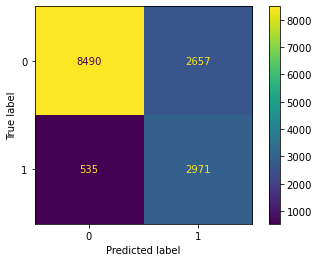

In [42]:
# Assessing the improvement
# Define model
logreg3 = LogisticRegression(C = 1, penalty = 'l2')

# Fit the model
logreg3.fit(X_train_res,y_train_res)

# Test the model
y_pred = logreg3.predict(X_test)

# Evaluate predictions
print("Logistic Regression before SMOTE")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(logreg3, X_test, y_test)
print(classification_report(y_test, y_pred))
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

#### Observations and model tuning :-
1. Even with the tuned parameter, though there is a slight improvement, but not significant increase in the model performance. However, we will consider this fine-tuned moodel as the final model.

## * Final Interpretation

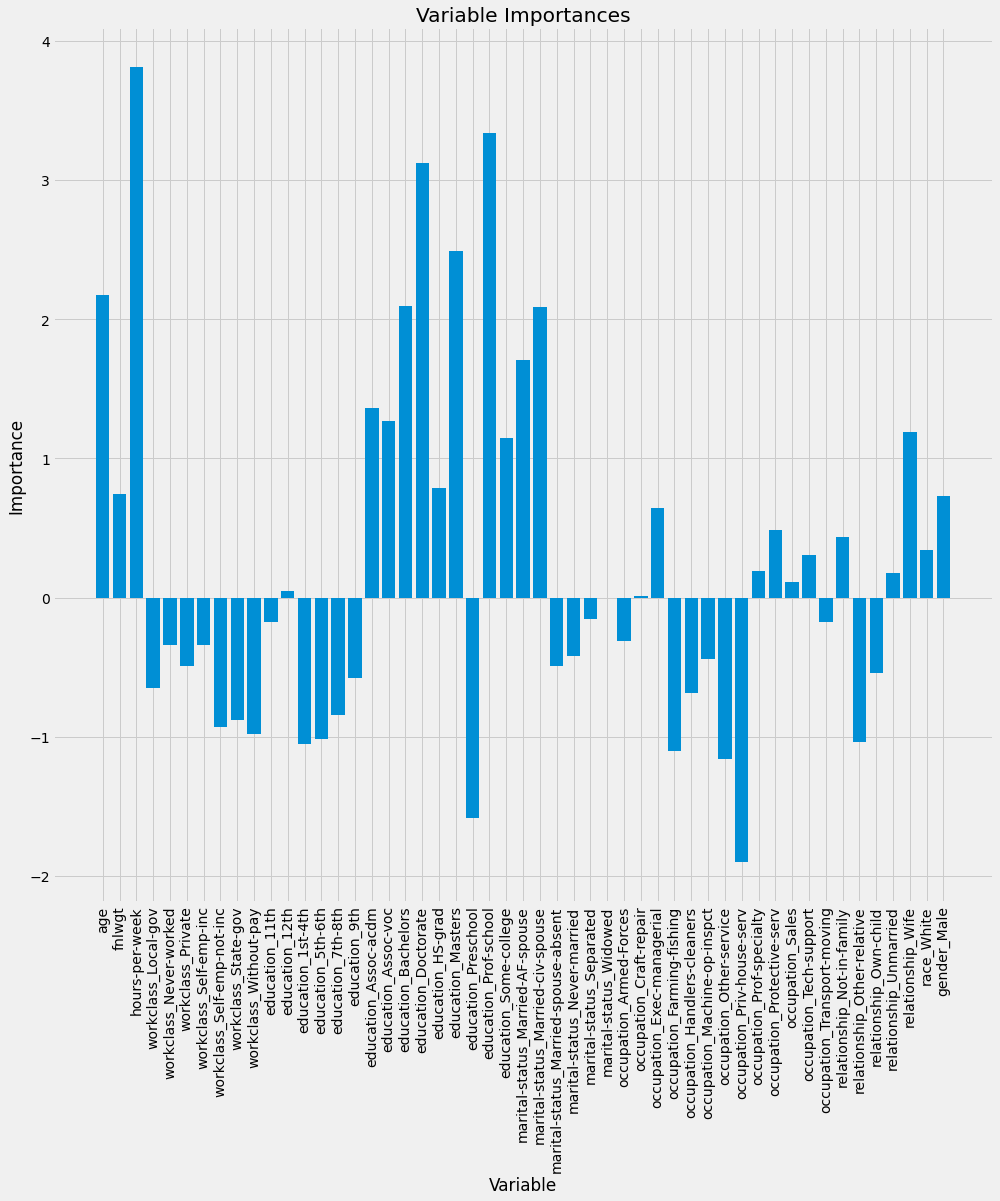

In [43]:
# Plotting the feaature importance to understand the effect
importance = logreg3.coef_[0]

feature_list = list(features.columns)

# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))

display(HTML('<b>Figure 8: Variable importance plot</b>'))
# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [44]:
# Get importance
display(HTML('<b>Table 10: Feature importance based on coef</b>'))
feature_importance = pd.DataFrame({'feature': list(features.columns), 'feature_importance': [abs(i) for i in importance]})
feature_importance.sort_values('feature_importance', ascending = False)

,feature,feature_importance
2,hours-per-week,3.811958
23,education_Prof-school,3.340402
19,education_Doctorate,3.120814
21,education_Masters,2.493159
0,age,2.175913
18,education_Bachelors,2.095362
26,marital-status_Married-civ-spouse,2.088539
38,occupation_Priv-house-serv,1.901963
25,marital-status_Married-AF-spouse,1.703970
22,education_Preschool,1.582559


In [45]:
data_final = pd.DataFrame(X_test, columns=feature_list)

data_final['y_actual'] = pd.DataFrame(y_test)

data_final['y_predicted'] = pd.DataFrame(y_pred)

data_final["id"] = data_final.index


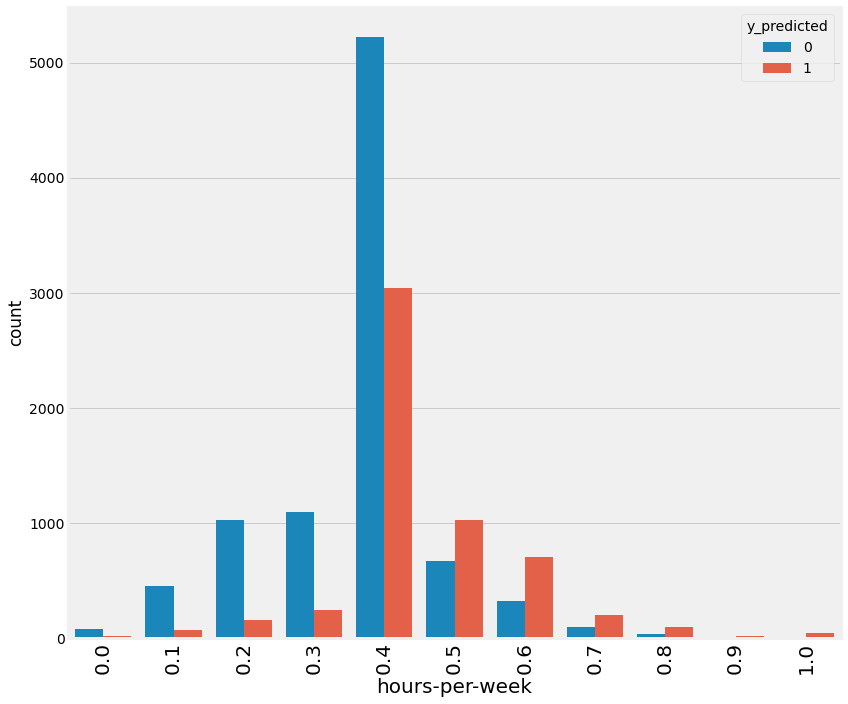

In [46]:
# Counting the entries for 9 variables against predicted class
display(HTML('<b>Figure 9: Hours per week Vs Predicted Class</b>'))
plt.figure(figsize=(12,10), facecolor="white")

sns.countplot(data_final['hours-per-week'].round(1), hue=data_final["y_predicted"], orient="v")
plt.xlabel('hours-per-week',fontsize=20)
plt.xticks(rotation=90,
           horizontalalignment='center',
           fontweight='light',
           fontsize='x-large')
plt.tight_layout()

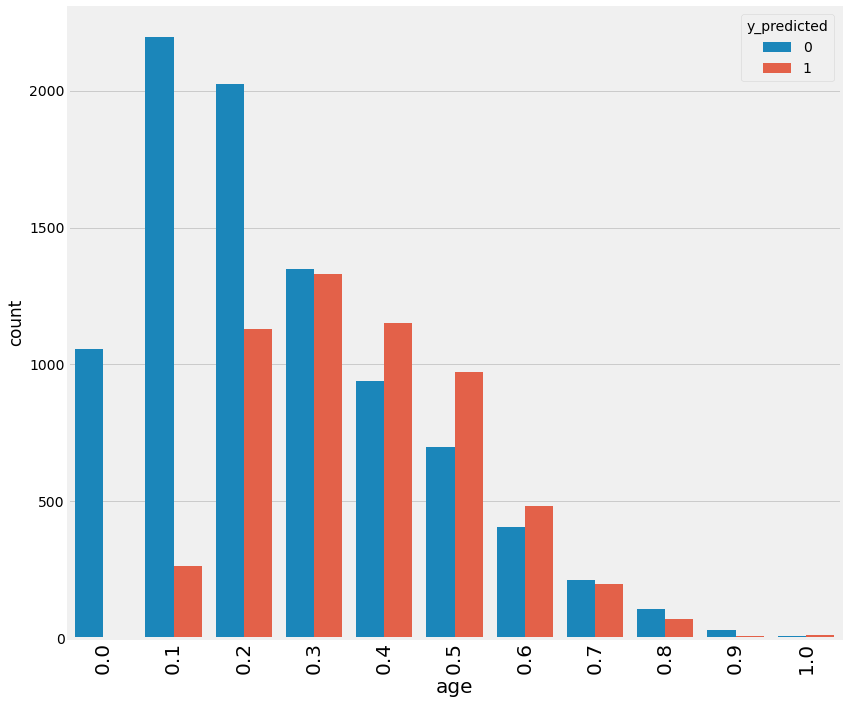

In [47]:
# Counting the entries for 9 variables against predicted class
display(HTML('<b>Figure 10: Age Vs Predicted Class</b>'))
plt.figure(figsize=(12,10), facecolor="white")

sns.countplot(data_final['age'].round(1), hue=data_final["y_predicted"], orient="v")
plt.xlabel('age',fontsize=20)
plt.xticks(rotation=90,
           horizontalalignment='center',
           fontweight='light',
           fontsize='x-large')
plt.tight_layout()

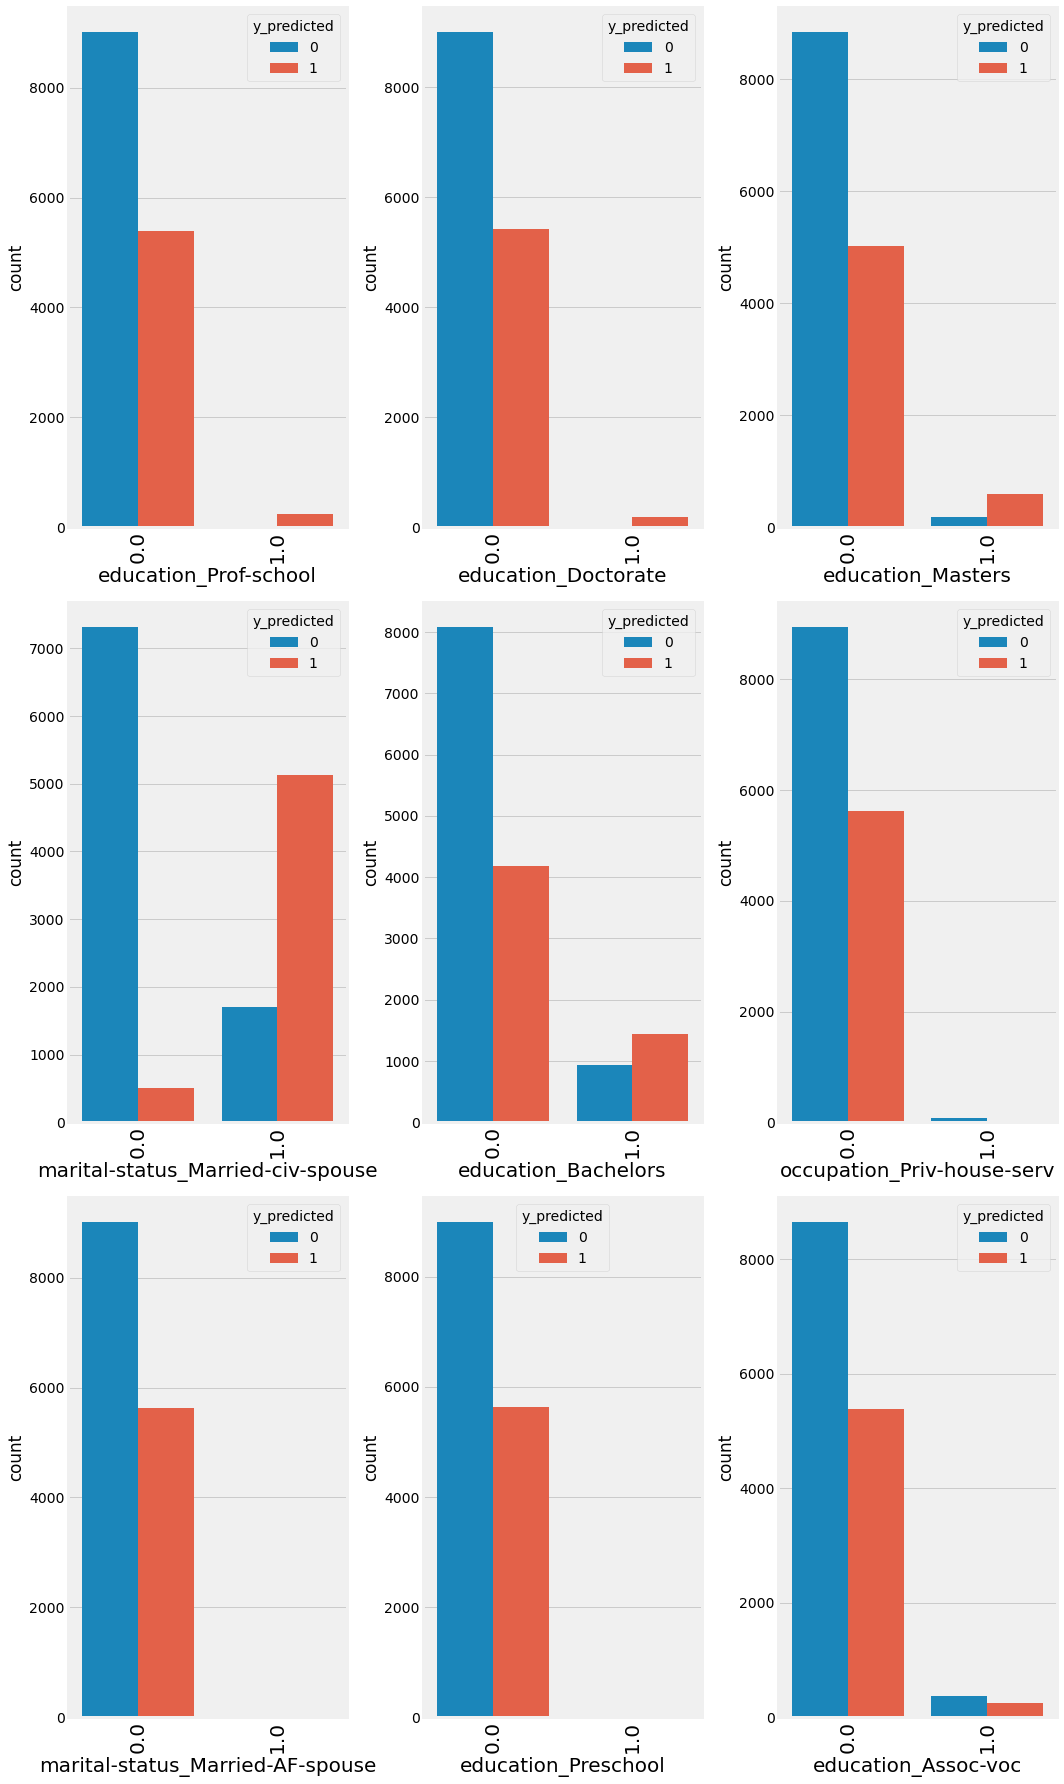

In [48]:
# Counting the entries for 9 variables against predicted class
display(HTML('<b>Figure 11: Top feature Vs Predicted Class</b>'))
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
top_columns = ['education_Prof-school', 'education_Doctorate', 'education_Masters', 'marital-status_Married-civ-spouse',
              'education_Bachelors', 'occupation_Priv-house-serv', 'marital-status_Married-AF-spouse',
              'education_Preschool', 'education_Assoc-voc']
for col in top_columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.countplot(data_final[col], hue=data_final["y_predicted"])
    plt.xlabel(col,fontsize=20)
    plt.xticks(rotation=90,
               horizontalalignment='center',
               fontweight='light',
               fontsize='x-large')
    plotnumber+=1
plt.tight_layout()

#### Final Observation :-
1. Being highly important with positive trend shows that the people who work more number of hours per week tend to earn > 50K compared to the people who work less number of hours per week.
2. People tends to earn leass than 50k when they are younger and as the experience increases they tend to earn more than 50K.
3. The entire population of the people who are prof-school by education earn >50K similar to those who have doctorate   education.
4. People earning greater than 50k is higher in the group where they are staying with their spouse as compared to people living without their spouse. 
5. Among the people who are bachelors by education earn slightly >50K compared to those who earn <50K.
   